In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_vs_baseline_across_vhpc'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'combine_train_test_patterns_across_tbs', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'combine_train_test_patterns_across_tbs_and_sess', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_across_tbs', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_across_tbs_and_sess', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [8]:
baseline_scores_prepost_pre_tb_0_vs_tb_0_CSm

array([ 0.44 ,  0.45 ,  0.52 ,  0.43 ,  0.445,  0.47 ,  0.41 ,  0.39 ,
        0.485,  0.51 ,  0.47 ,  0.37 ,  0.385,  0.435,  0.485])

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

all_animals  = np.loadtxt('../allmice.txt', dtype=str)
expo_animals = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
ext2_animals = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals = np.loadtxt('../ext1_mice.txt', dtype=str)

In [8]:
#find animals common to both sessions
expopre_animals = np.intersect1d(expo_animals, pre_animals)
expopost_animals = np.intersect1d(expo_animals, post_animals)
prepost_animals = np.intersect1d(pre_animals, post_animals)
preext1_animals = np.intersect1d(pre_animals, ext1_animals)
preext2_animals = np.intersect1d(pre_animals, ext2_animals)
prerenew_animals = np.intersect1d(pre_animals, renew_animals)
postext1_animals = np.intersect1d(post_animals, ext1_animals)
postext2_animals = np.intersect1d(post_animals, ext2_animals)
postrenew_animals = np.intersect1d(post_animals, renew_animals)
ext1ext2_animals = np.intersect1d(ext1_animals, ext2_animals)
ext1renew_animals = np.intersect1d(ext1_animals, renew_animals)
ext2renew_animals = np.intersect1d(ext2_animals, renew_animals)

In [9]:
sessions = 'expo', 'pre','d2', 'post','ext1','ext2','renew'

In [10]:
for sess in sessions[1:]:

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [11]:
#have to extract expo varibles differently from that used above
patterns_tb_expo = dict(zip(expo_animals,
                                [ut.load_variable('patterns_tb','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

labels_expo = dict(zip(expo_animals,
                                [ut.load_variable('labels','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

In [12]:
#get patterns of CellReg'd cells
expopre_patterns_expo_first30 = load_all_animals_vars('patterns_evs_expopre', expopre_animals, '', notebook='decoding_expoVSpre_30trials')          
expopre_patterns_pre_first30 = load_all_animals_vars('patterns_evs_pre_first30', expopre_animals, '', notebook='decoding_expoVSpre_30trials')                                            
expopre_labels_expo_first30 = load_all_animals_vars('labels_expo',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
expopre_labels_pre_first30 = load_all_animals_vars('labels_pre_first30',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
prepost_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_post', prepost_animals, '', notebook='patterns_time_bins')             
prepost_patterns_post = load_all_animals_vars('patterns_evs_1s_post_pre', prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='patterns_time_bins')
preext1_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext1', preext1_animals, '', notebook='patterns_time_bins')             
preext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_pre', preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_pre = load_all_animals_vars('labels_pre',preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_ext1 = load_all_animals_vars('labels_ext1',preext1_animals, '', notebook='patterns_time_bins')
preext2_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext2', preext2_animals, '', notebook='patterns_time_bins')             
preext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_pre', preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_pre = load_all_animals_vars('labels_pre',preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_ext2 = load_all_animals_vars('labels_ext2',preext2_animals, '', notebook='patterns_time_bins')
prerenew_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_renew', prerenew_animals, '', notebook='patterns_time_bins')             
prerenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_pre', prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_pre = load_all_animals_vars('labels_pre',prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_renew = load_all_animals_vars('labels_renew',prerenew_animals, '', notebook='patterns_time_bins')
postext1_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_post = load_all_animals_vars('labels_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_ext1 = load_all_animals_vars('labels_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext2_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext2',postext2_animals, '', notebook='patterns_time_bins')
postext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_post = load_all_animals_vars('labels_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_ext2 = load_all_animals_vars('labels_ext2',postext2_animals, '', notebook='patterns_time_bins')
postrenew_patterns_post = load_all_animals_vars('patterns_evs_1s_post_renew',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_post = load_all_animals_vars('labels_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_renew = load_all_animals_vars('labels_renew',postrenew_animals, '', notebook='patterns_time_bins')
ext1ext2_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_ext2', ext1ext2_animals, '', notebook='patterns_time_bins')             
ext1ext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_ext1', ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext1 = load_all_animals_vars('labels_ext1',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext2 = load_all_animals_vars('labels_ext2',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1renew_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_renew', ext1renew_animals, '', notebook='patterns_time_bins')             
ext1renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext1', ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_ext1 = load_all_animals_vars('labels_ext1',ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_renew = load_all_animals_vars('labels_renew',ext1renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext2',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_renew = load_all_animals_vars('labels_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_ext2 = load_all_animals_vars('labels_ext2',ext2renew_animals, '', notebook='patterns_time_bins')


In [13]:
all_comparisons = 'prepost_patterns_pre',\
'prepost_patterns_post',\
'preext1_patterns_pre',\
'preext1_patterns_ext1',\
'preext2_patterns_pre',\
'preext2_patterns_ext2',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postext1_patterns_post',\
'postext1_patterns_ext1',\
'postext2_patterns_post',\
'postext2_patterns_ext2',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\
'ext1ext2_patterns_ext1',\
'ext1ext2_patterns_ext2',\
'ext1renew_patterns_ext1',\
'ext1renew_patterns_renew',\
'ext2renew_patterns_renew',\
'ext2renew_patterns_ext2'

In [14]:
all_comparisons_partners = 'post',\
'pre',\
'ext1',\
'pre',\
'ext2',\
'pre',\
'renew',\
'pre',\
'ext1',\
'post',\
'ext2',\
'post',\
'renew',\
'post',\
'ext2',\
'ext1',\
'renew',\
'ext1',\
'ext2',\
'renew'

In [15]:
#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(len(patterns_tb_pre['90'])):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('_')[0]):
            try:
                print comp.split('_')[0],
                print ani,
                print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

prepost 90 0 prepost 91 0 prepost 92 0 prepost 93 0 prepost c10m8 0 prepost c3f2 0 prepost c3f3 0 prepost c3m1 0 prepost c3m2 0 prepost c4m3 0 prepost c4m4 0 prepost 90 1 prepost 91 1 prepost 92 1 prepost 93 1 prepost c10m8 1 prepost c3f2 1 prepost c3f3 1 prepost c3m1 1 prepost c3m2 1 prepost c4m3 1 prepost c4m4 1 prepost 90 2 prepost 91 2 prepost 92 2 prepost 93 2 prepost c10m8 2 prepost c3f2 2 prepost c3f3 2 prepost c3m1 2 prepost c3m2 2 prepost c4m3 2 prepost c4m4 2 prepost 90 3 prepost 91 3 prepost 92 3 prepost 93 3 prepost c10m8 3 prepost c3f2 3 prepost c3f3 3 prepost c3m1 3 prepost c3m2 3 prepost c4m3 3 prepost c4m4 3 prepost 90 4 prepost 91 4 prepost 92 4 prepost 93 4 prepost c10m8 4 prepost c3f2 4 prepost c3f3 4 prepost c3m1 4 prepost c3m2 4 prepost c4m3 4 prepost c4m4 4 prepost 90 5 prepost 91 5 prepost 92 5 prepost 93 5 prepost c10m8 5 prepost c3f2 5 prepost c3f3 5 prepost c3m1 5 prepost c3m2 5 prepost c4m3 5 prepost c4m4 5 prepost 90 6 prepost 91 6 prepost 92 6 prepost 93 6 

In [16]:
delta_t0 = 1

t_start0 = -5  # sec
t_stop0 = 11  # sec

In [17]:
#set downsampling parameter to:
#max_cells = all cells
#intraregion_min = downsample to the comparison with fewest cells within the same hippo region
#interregion_min = downsample to the comparison with fewest cells, considering both hippo regions
#gmin = the global minimum (pretty much corresponds to interregion_min)

downsample = 'gmin'

In [18]:
if downsample == 'max_cells':
    n_cells = None #will use all registered cells
if downsample == 'intraregion_min':
    n_cells = ut.load_variable('n_cells_across_min_vhpc', '../notebooks/autorestore/n_cells/')
if downsample == 'interregion_min':
    n_cells = ut.load_variable('n_cells_across_min_overall', '../notebooks/autorestore/n_cells/')
if downsample == 'gmin':
    n_cells = ut.load_variable('n_cells_gmin', '../notebooks/autorestore/n_cells/')
if downsample == 200:
    n_cells = 200
    
print "# of cells =",n_cells

# of cells = 147


import h5py

def do_decoding_combined_within(patterns, labels, n_loops=10, ncells=None, cellreg=False, n_steps=15, **args):
     
    scores = np.r_[[do_test_within(patterns, labels, **args) for i in range(n_loops)]]
    
    if ncells is None:
        total_n = np.sum([patterns[ani].shape[1] for ani in patterns.keys()])
        ncells = np.repeat(np.r_[np.linspace(5, total_n, n_steps).astype(int)], 5)
        
    scores_ncells = np.r_[[do_test_within(patterns, labels, n_cells=n, **args) 
                                        for n in ncells]]
    
    return scores, ncells, scores_ncells


from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns(patterns, labels, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):

    if classes is None:
        classes = [0, 1]

    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(labels[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns.copy()
        labels_T = labels.copy()
        for ani in patterns.keys():
            patterns_T[ani] = patterns[ani][which_test[ani]]
            labels_T[ani] = labels[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_within(patterns, labels, **args):
    x, y, xT, yT = combine_train_test_patterns(patterns, labels, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)
        
def load_cellreg(animal, filename='pre_vs_post.mat', keys=['pre', 'post']):
    with h5py.File('../%s/data/%s'%(animal, filename), 'r') as f:
        g = np.r_[f['cell_registered_struct']['cell_to_index_map']]
        cellreg_dict = {k:g[i][np.where(np.prod([gg>0 for gg in g], 0))[0]].astype(int)-1
                        for i, k in enumerate(keys)}
    return cellreg_dict

In [6]:
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [7]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=15, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

In [21]:
#for sess in sessions:
#    for t in range(16):
#        exec('patterns_tb_%s_%s = {}'%(t, sess))
#        for ani in eval('%s_animals'%sess):
#            try:
#                print sess,
#                print ani,
#                exec("patterns_tb_%s_%s['%s'] = patterns_tb_%s['%s'][%s]"%(t,sess,ani,sess,ani,t))
#            except IOError as error:
#                print error
#            continue

### need to take data from a single trial type and duplicate it, assigning it a new label/class. Then use the baseline time bin of the dataset with this new label and decode against all time bins from original dataset

In [22]:
#make a new label array, assigning new labels for each trial type
relabel_baselines = {0:2,1:3}

for comp in all_comparisons:
    exec("labels_baselines_%s = {}"%comp)
    for ani in eval("%s_animals"%comp.split("_")[0]):
        exec("labels_baselines_%s[ani] = np.r_[[relabel_baselines[l] for l in labels_%s[ani]]]"%(comp,comp.split("_")[-1]))

In [23]:
#concatenate new label array to original
for comp in all_comparisons:
    exec("labels_%s_w_baselines = {}"%comp)
    for ani in eval("%s_animals"%comp.split("_")[0]):
        exec("labels_%s_w_baselines[ani] = np.concatenate((labels_%s[ani],labels_baselines_%s[ani]))"%(comp,comp.split("_")[-1],comp))

In [24]:
# concatenate patterns from a single, baseline time bin to each of the other time bins
base = 1 # time bin that will be used as baseline (0 = -5 to -4)
for comp in all_comparisons:
    for t in range(16):
        exec("%s_tb_%s_w_baselines = {}"%(comp,t))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("%s_tb_%s_w_baselines[ani] = np.concatenate((%s_tb_%s[ani],%s_tb_%s[ani]))"%(comp,t,comp,t,comp,base))

In [25]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns_across_tbs(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):

    if classes is None:
        classes = [0, 1]

    which_train = {}
    which_test = {}
    for ani in patterns_train.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns_train.copy()
    labels_t = labels_train.copy()
    for ani in patterns_train.keys():
        patterns_t[ani] = patterns_train[ani][which_train[ani]]
        labels_t[ani] = labels_train[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns_test.copy()
        labels_T = labels_test.copy()
        for ani in patterns_test.keys():
            patterns_T[ani] = patterns_test[ani][which_test[ani]]
            labels_T[ani] = labels_test[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_across_tbs(patterns_train,labels_train,patterns_test,labels_test, **args):
    x, y, xT, yT = combine_train_test_patterns_across_tbs(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)

In [26]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [ ]:
%%time
#within session
relabel = {0:0,1:-1,2:1,3:-1}
n_loops=15
for comp in all_comparisons:
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSp = {}'%(comp.split('_')[0],comp.split('_')[-1],t,c))
            print comp,t,c,
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSp = np.r_[[do_test_across_tbs(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_baselines, labels_%s_w_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(comp.split('_')[0],comp.split('_')[-1],t,c,comp,t,comp,comp,c,comp))

In [ ]:
%%time
#within session
relabel = {0:-1,1:1,2:-1,3:0}
n_loops=15
for comp in all_comparisons:
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm = {}'%(comp.split('_')[0],comp.split('_')[-1],t,c))
            print comp,t,c,
            exec('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_baselines, labels_%s_w_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(comp.split('_')[0],comp.split('_')[-1],t,c,comp,t,comp,comp,c,comp))

need to combine epoch tbs from one sess with baseline tbs from another sess, then make labels to match.
for example, concatenate pre baseline tb and pre baseline labels to post tb and post labels for comparing pre vs post

In [ ]:
# concatenate baseline time bin patterns from one session to each of the time bins in its 'partner' session (the session you're decdoing across)
base = 1 # time bin that will be used as baseline (0 = -5 to -4)
for comp,partner in zip(all_comparisons, all_comparisons_partners):
    for t in range(16):
        exec("%s_tb_%s_w_%s_baselines = {}"%(comp,t,partner))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("%s_tb_%s_w_%s_baselines[ani] = np.concatenate((%s_tb_%s[ani],%s_patterns_%s_tb_%s[ani]))"%(comp,t,partner,comp,t,
                                                                                                 comp.split("_")[0],partner,base))

In [ ]:
# concatenate labels from baseline session and its across-session partner
for comp,partner in zip(all_comparisons, all_comparisons_partners):
    for t in range(16):
        exec("labels_%s_w_%s_baselines = {}"%(comp,partner))
        for ani in eval("%s_tb_%s.keys()"%(comp,t)):
            exec("labels_%s_w_%s_baselines[ani] = np.concatenate((labels_%s[ani],labels_baselines_%s_patterns_%s[ani]))"%(comp,partner,comp.split("_")[-1],
                                                                                                              comp.split("_")[0],partner))

In [9]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, classes=range(0,4), n_cells=None,
                                relabel=None, relabel_test=None):

    which_train = {}
    which_test = {}
    for ani in patterns_train.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l<2:
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                wT = np.random.permutation(np.where(labels_test[ani]==l)[0])
                which_trains.append(wt[int(len(wt)*.5):])
                which_tests.append(wT[int(len(wT)*.5):])
            if l>=2: #make sure you train and test on different trials for the baseline patterns (because you're using the same pool for training and testing)
                wt = np.random.permutation(np.where(labels_train[ani]==l)[0])
                wT = wt[:int(len(wt)*train_test_split)]
                which_trains.append(wt[int(len(wt)*train_test_split):])
                which_tests.append(wT)

        which_train[ani] = np.concatenate(which_trains)
        which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns_train.copy()
    labels_t = labels_train.copy()
    for ani in patterns_train.keys():
        patterns_t[ani] = patterns_train[ani][which_train[ani]]
        labels_t[ani] = labels_train[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns_test.copy()
        labels_T = labels_test.copy()
        for ani in patterns_test.keys():
            patterns_T[ani] = patterns_test[ani][which_test[ani]]
            labels_T[ani] = labels_test[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, **args):
    x, y, xT, yT = combine_train_test_patterns_across_tbs_and_sess(patterns_train,labels_train,patterns_test,labels_test, train_test_split=0.5, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)

#### now decode using both labels from a single trial type, reserving one label for the baseline time bin, and the other label for all time bins

In [32]:
AC = all_comparisons
ACP = all_comparisons_partners

In [33]:
%%time
#across sessions
relabel = {0:0,1:-1,2:1,3:-1}
n_loops=15
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC),2):
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

prepost_patterns_pre 0 0 prepost_patterns_pre 0 1 prepost_patterns_pre 0 2 prepost_patterns_pre 0 3 prepost_patterns_pre 0 4 prepost_patterns_pre 0 5 prepost_patterns_pre 0 6 prepost_patterns_pre 0 7 prepost_patterns_pre 0 8 prepost_patterns_pre 0 9 prepost_patterns_pre 0 10 prepost_patterns_pre 0 11 prepost_patterns_pre 0 12 prepost_patterns_pre 0 13 prepost_patterns_pre 0 14 prepost_patterns_pre 0 15 prepost_patterns_pre 1 0 prepost_patterns_pre 1 1 prepost_patterns_pre 1 2 prepost_patterns_pre 1 3 prepost_patterns_pre 1 4 prepost_patterns_pre 1 5 prepost_patterns_pre 1 6 prepost_patterns_pre 1 7 prepost_patterns_pre 1 8 prepost_patterns_pre 1 9 prepost_patterns_pre 1 10 prepost_patterns_pre 1 11 prepost_patterns_pre 1 12 prepost_patterns_pre 1 13 prepost_patterns_pre 1 14 prepost_patterns_pre 1 15 prepost_patterns_pre 2 0 prepost_patterns_pre 2 1 prepost_patterns_pre 2 2 prepost_patterns_pre 2 3 prepost_patterns_pre 2 4 prepost_patterns_pre 2 5 prepost_patterns_pre 2 6 prepost_patte

In [34]:
%%time
#across sessions
relabel = {0:0,1:-1,2:1,3:-1}
n_loops=15
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

prepost_patterns_post 0 0 prepost_patterns_post 0 1 prepost_patterns_post 0 2 prepost_patterns_post 0 3 prepost_patterns_post 0 4 prepost_patterns_post 0 5 prepost_patterns_post 0 6 prepost_patterns_post 0 7 prepost_patterns_post 0 8 prepost_patterns_post 0 9 prepost_patterns_post 0 10 prepost_patterns_post 0 11 prepost_patterns_post 0 12 prepost_patterns_post 0 13 prepost_patterns_post 0 14 prepost_patterns_post 0 15 prepost_patterns_post 1 0 prepost_patterns_post 1 1 prepost_patterns_post 1 2 prepost_patterns_post 1 3 prepost_patterns_post 1 4 prepost_patterns_post 1 5 prepost_patterns_post 1 6 prepost_patterns_post 1 7 prepost_patterns_post 1 8 prepost_patterns_post 1 9 prepost_patterns_post 1 10 prepost_patterns_post 1 11 prepost_patterns_post 1 12 prepost_patterns_post 1 13 prepost_patterns_post 1 14 prepost_patterns_post 1 15 prepost_patterns_post 2 0 prepost_patterns_post 2 1 prepost_patterns_post 2 2 prepost_patterns_post 2 3 prepost_patterns_post 2 4 prepost_patterns_post 2 5 

In [35]:
%%time
#across sessions
relabel = {0:-1,1:1,2:-1,3:0}
n_loops=15
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(0,len(AC),2):
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c,AC[i+1],t,AC[i+1],AC[i],c,ACP[i],AC[i],ACP[i]))

prepost_patterns_pre 0 0 prepost_patterns_pre 0 1 prepost_patterns_pre 0 2 prepost_patterns_pre 0 3 prepost_patterns_pre 0 4 prepost_patterns_pre 0 5 prepost_patterns_pre 0 6 prepost_patterns_pre 0 7 prepost_patterns_pre 0 8 prepost_patterns_pre 0 9 prepost_patterns_pre 0 10 prepost_patterns_pre 0 11 prepost_patterns_pre 0 12 prepost_patterns_pre 0 13 prepost_patterns_pre 0 14 prepost_patterns_pre 0 15 prepost_patterns_pre 1 0 prepost_patterns_pre 1 1 prepost_patterns_pre 1 2 prepost_patterns_pre 1 3 prepost_patterns_pre 1 4 prepost_patterns_pre 1 5 prepost_patterns_pre 1 6 prepost_patterns_pre 1 7 prepost_patterns_pre 1 8 prepost_patterns_pre 1 9 prepost_patterns_pre 1 10 prepost_patterns_pre 1 11 prepost_patterns_pre 1 12 prepost_patterns_pre 1 13 prepost_patterns_pre 1 14 prepost_patterns_pre 1 15 prepost_patterns_pre 2 0 prepost_patterns_pre 2 1 prepost_patterns_pre 2 2 prepost_patterns_pre 2 3 prepost_patterns_pre 2 4 prepost_patterns_pre 2 5 prepost_patterns_pre 2 6 prepost_patte

In [36]:
%%time
#across sessions
relabel = {0:-1,1:1,2:-1,3:0}
n_loops=15
#for comp, partner in zip(all_comparisons, all_comparisons_partners):
for i in range(1,len(AC),2): #### THIS IS WHAT'S DIFFERENT FROM THE ABOVE
    for t in range(16): # number of time bins
        for c in range(16):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c))
            print AC[i],t,c,
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = np.r_[[do_test_across_tbs_and_sess(%s_tb_%s_w_baselines,labels_%s_w_baselines,\
                  %s_tb_%s_w_%s_baselines, labels_%s_w_%s_baselines, n_cells=n_cells,classes=range(0,4),relabel=relabel)\
                  for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c,AC[i-1],t,AC[i-1],AC[i],c,ACP[i],AC[i],ACP[i]))

prepost_patterns_post 0 0 prepost_patterns_post 0 1 prepost_patterns_post 0 2 prepost_patterns_post 0 3 prepost_patterns_post 0 4 prepost_patterns_post 0 5 prepost_patterns_post 0 6 prepost_patterns_post 0 7 prepost_patterns_post 0 8 prepost_patterns_post 0 9 prepost_patterns_post 0 10 prepost_patterns_post 0 11 prepost_patterns_post 0 12 prepost_patterns_post 0 13 prepost_patterns_post 0 14 prepost_patterns_post 0 15 prepost_patterns_post 1 0 prepost_patterns_post 1 1 prepost_patterns_post 1 2 prepost_patterns_post 1 3 prepost_patterns_post 1 4 prepost_patterns_post 1 5 prepost_patterns_post 1 6 prepost_patterns_post 1 7 prepost_patterns_post 1 8 prepost_patterns_post 1 9 prepost_patterns_post 1 10 prepost_patterns_post 1 11 prepost_patterns_post 1 12 prepost_patterns_post 1 13 prepost_patterns_post 1 14 prepost_patterns_post 1 15 prepost_patterns_post 2 0 prepost_patterns_post 2 1 prepost_patterns_post 2 2 prepost_patterns_post 2 3 prepost_patterns_post 2 4 prepost_patterns_post 2 5 

In [41]:
#make dictionary of comparisons
for t in range (16):
    exec('distinct%s_CSp = {}'%t)
    exec('distinct%s_CSm = {}'%t)
    
for i in range(len(AC)):
    for t in range (16):
        exec("distinct%s_CSp['%s_%s_w_%s_base'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i]))
        for c in range (16):
            eval("distinct%s_CSp['%s_%s_w_%s_base']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp'%(AC[i].split('_')[0],AC[i].split('_')[-1],
                    ACP[i],t,c))))

for i in range(len(AC)):
    for t in range (16):
        exec("distinct%s_CSm['%s_%s_w_%s_base'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i]))
        for c in range (16):
            eval("distinct%s_CSm['%s_%s_w_%s_base']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm'%(AC[i].split('_')[0],AC[i].split('_')[-1],
                    ACP[i],t,c))))
            
for comp in all_comparisons:
    for t in range (16):
        exec("distinct%s_CSp['%s_%s_w_%s_base'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            eval("distinct%s_CSp['%s_%s_w_%s_base']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSp'%(comp.split('_')[0],comp.split('_')[-1],t,c))))
            
for comp in all_comparisons:
    for t in range (16):
        exec("distinct%s_CSm['%s_%s_w_%s_base'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            eval("distinct%s_CSm['%s_%s_w_%s_base']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm'%(comp.split('_')[0],comp.split('_')[-1],t,c))))

In [57]:
#perform wilcoxon test (nonparametric) for each decoding epoch vs chance (.5)
for tt in 'CSp','CSm':
    for t in range(16):
        exec("distinct%s_%s_wilcox = {}"%(t,tt))
        for i in eval("distinct%s_%s"%(t,tt)):
            exec("distinct%s_%s_wilcox[i] = [[] for x in range(len(distinct%s_%s[i]))]"%(t,tt,t,tt)) #initialize list of lists with proper # of entries
            for r in range(len(eval("distinct%s_%s[i]"%(t,tt)))):
                exec("subtracted = [x-0.5 for x in distinct%s_%s[i][r]]"%(t,tt))
                exec("distinct%s_%s_wilcox[i][r] =  sstats.wilcoxon(subtracted[:15])"%(t,tt))
                exec("distinct%s_%s_wilcox[i][r] = distinct%s_%s_wilcox[i][r][-1]"%(t,tt,t,tt)) #only take p-values

In [50]:
#make dictionary of comparisons, taking mean of all loops
for t in range (16):
    exec('distinct%s_means_CSp = {}'%t)
    exec('distinct%s_means_CSm = {}'%t)
    
for i in range(len(AC)):
    for t in range (16):
        exec("distinct%s_means_CSp['%s_%s_w_%s_base'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i]))
        for c in range (16):
            eval("distinct%s_means_CSp['%s_%s_w_%s_base']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp'%(AC[i].split('_')[0],AC[i].split('_')[-1],
                    ACP[i],t,c))).mean())

for i in range(len(AC)):
    for t in range (16):
        exec("distinct%s_means_CSm['%s_%s_w_%s_base'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i]))
        for c in range (16):
            eval("distinct%s_means_CSm['%s_%s_w_%s_base']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i])).insert(c,
                    (eval('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm'%(AC[i].split('_')[0],AC[i].split('_')[-1],
                    ACP[i],t,c))).mean())
            
for comp in all_comparisons:
    for t in range (16):
        exec("distinct%s_means_CSp['%s_%s_w_%s_base'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            eval("distinct%s_means_CSp['%s_%s_w_%s_base']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSp'%(comp.split('_')[0],comp.split('_')[-1],t,c))).mean())
            
for comp in all_comparisons:
    for t in range (16):
        exec("distinct%s_means_CSm['%s_%s_w_%s_base'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            eval("distinct%s_means_CSm['%s_%s_w_%s_base']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,
                    (eval('baseline_scores_%s_%s_tb_%s_vs_tb_%s_CSm'%(comp.split('_')[0],comp.split('_')[-1],t,c))).mean())

In [58]:
distinct_means_CSp={}
for i in distinct0_means_CSp:
    distinct_means_CSp[i]=[]
    for r in range(len(distinct0_means_CSp[i])):
        distinct_means_CSp[i].append(eval("distinct%s_means_CSp"%r)[i])
    np.array([distinct_means_CSp[i]])

In [61]:
distinct_means_CSm={}
for i in distinct0_means_CSm:
    distinct_means_CSm[i]=[]
    for r in range(len(distinct0_means_CSm[i])):
        distinct_means_CSm[i].append(eval("distinct%s_means_CSm"%r)[i])
    np.array([distinct_means_CSm[i]])

In [64]:
mega_list_col1 = ['preext1_pre_w_pre_base'],['prepost_pre_w_post_base'],['preext1_pre_w_ext1_base'],['preext2_pre_w_ext2_base'],['prerenew_pre_w_renew_base']
mega_list_col2 = ['prepost_pre_w_post_base'],['prepost_post_w_post_base'],['postext1_post_w_ext1_base'],['postext2_post_w_ext2_base'],['postrenew_post_w_renew_base']
mega_list_col3 = ['preext1_pre_w_ext1_base'],['postext1_post_w_ext1_base'],['postext1_ext1_w_ext1_base'],['ext1ext2_ext1_w_ext2_base'],['ext1renew_ext1_w_renew_base']
mega_list_col4 = ['preext2_pre_w_ext2_base'],['postext2_post_w_ext2_base'],['ext1ext2_ext1_w_ext2_base'],['ext1ext2_ext2_w_ext2_base'],['ext2renew_ext2_w_renew_base']
mega_list_col5 = ['prerenew_pre_w_renew_base'],['postrenew_post_w_renew_base'],['ext1renew_ext1_w_renew_base'],['ext2renew_ext2_w_renew_base'],['postrenew_renew_w_renew_base']

In [77]:
#organize matrix of decoding scores
for tt in 'CSp','CSm':
    for col in range(1,6):
        exec("mega_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,tt))
        for x in range(len(distinct0_means_CSp['ext1ext2_ext1_w_ext1_base'])): #just choosing any key here
            exec("mega_col%s_%s[%s] = []"%(col,tt,x))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct0_means_CSp['ext1ext2_ext1_w_ext1_base'])):
                        print col,x,c,comp,y,'ok',
                        eval("mega_col%s_%s[x]"%(col,tt)).insert((16*c)+y, eval("distinct%s_means_%s[comp][y]"%(x,tt)))

1 0 0 preext1_pre_w_pre_base 0 ok 1 0 0 preext1_pre_w_pre_base 1 ok 1 0 0 preext1_pre_w_pre_base 2 ok 1 0 0 preext1_pre_w_pre_base 3 ok 1 0 0 preext1_pre_w_pre_base 4 ok 1 0 0 preext1_pre_w_pre_base 5 ok 1 0 0 preext1_pre_w_pre_base 6 ok 1 0 0 preext1_pre_w_pre_base 7 ok 1 0 0 preext1_pre_w_pre_base 8 ok 1 0 0 preext1_pre_w_pre_base 9 ok 1 0 0 preext1_pre_w_pre_base 10 ok 1 0 0 preext1_pre_w_pre_base 11 ok 1 0 0 preext1_pre_w_pre_base 12 ok 1 0 0 preext1_pre_w_pre_base 13 ok 1 0 0 preext1_pre_w_pre_base 14 ok 1 0 0 preext1_pre_w_pre_base 15 ok 1 0 1 prepost_pre_w_post_base 0 ok 1 0 1 prepost_pre_w_post_base 1 ok 1 0 1 prepost_pre_w_post_base 2 ok 1 0 1 prepost_pre_w_post_base 3 ok 1 0 1 prepost_pre_w_post_base 4 ok 1 0 1 prepost_pre_w_post_base 5 ok 1 0 1 prepost_pre_w_post_base 6 ok 1 0 1 prepost_pre_w_post_base 7 ok 1 0 1 prepost_pre_w_post_base 8 ok 1 0 1 prepost_pre_w_post_base 9 ok 1 0 1 prepost_pre_w_post_base 10 ok 1 0 1 prepost_pre_w_post_base 11 ok 1 0 1 prepost_pre_w_post_bas

In [78]:
mega_distinct_means_all_CSp = mega_col1_CSp+mega_col2_CSp+mega_col3_CSp+mega_col4_CSp+mega_col5_CSp
mega_distinct_means_all_CSm = mega_col1_CSm+mega_col2_CSm+mega_col3_CSm+mega_col4_CSp+mega_col5_CSm

In [79]:
#organize matrix of p-values
for tt in 'CSp','CSm':
    for col in range(1,6):
        exec("mega_pval_col%s_%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%(col,tt))
        for x in range(len(distinct0_CSp_wilcox['ext1ext2_ext1_w_ext1_base'])): #just choosing any key here
            exec("mega_pval_col%s_%s[%s] = []"%(col,tt,x))
            for c in range(len(mega_list_col1)):
                for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                    for y in range(len(distinct0_CSp_wilcox['ext1ext2_ext1_w_ext1_base'])):
                        print col,x,c,comp,y,'ok',
                        eval("mega_pval_col%s_%s[x]"%(col,tt)).insert((16*c)+y, eval("distinct%s_%s_wilcox[comp][y]"%(x,tt)))

1 0 0 preext1_pre_w_pre_base 0 ok 1 0 0 preext1_pre_w_pre_base 1 ok 1 0 0 preext1_pre_w_pre_base 2 ok 1 0 0 preext1_pre_w_pre_base 3 ok 1 0 0 preext1_pre_w_pre_base 4 ok 1 0 0 preext1_pre_w_pre_base 5 ok 1 0 0 preext1_pre_w_pre_base 6 ok 1 0 0 preext1_pre_w_pre_base 7 ok 1 0 0 preext1_pre_w_pre_base 8 ok 1 0 0 preext1_pre_w_pre_base 9 ok 1 0 0 preext1_pre_w_pre_base 10 ok 1 0 0 preext1_pre_w_pre_base 11 ok 1 0 0 preext1_pre_w_pre_base 12 ok 1 0 0 preext1_pre_w_pre_base 13 ok 1 0 0 preext1_pre_w_pre_base 14 ok 1 0 0 preext1_pre_w_pre_base 15 ok 1 0 1 prepost_pre_w_post_base 0 ok 1 0 1 prepost_pre_w_post_base 1 ok 1 0 1 prepost_pre_w_post_base 2 ok 1 0 1 prepost_pre_w_post_base 3 ok 1 0 1 prepost_pre_w_post_base 4 ok 1 0 1 prepost_pre_w_post_base 5 ok 1 0 1 prepost_pre_w_post_base 6 ok 1 0 1 prepost_pre_w_post_base 7 ok 1 0 1 prepost_pre_w_post_base 8 ok 1 0 1 prepost_pre_w_post_base 9 ok 1 0 1 prepost_pre_w_post_base 10 ok 1 0 1 prepost_pre_w_post_base 11 ok 1 0 1 prepost_pre_w_post_bas

In [80]:
mega_distinct_pval_all_CSp = mega_pval_col1_CSp+mega_pval_col2_CSp+mega_pval_col3_CSp+mega_pval_col4_CSp+mega_pval_col5_CSp
mega_distinct_pval_all_CSm = mega_pval_col1_CSm+mega_pval_col2_CSm+mega_pval_col3_CSm+mega_pval_col4_CSm+mega_pval_col5_CSm

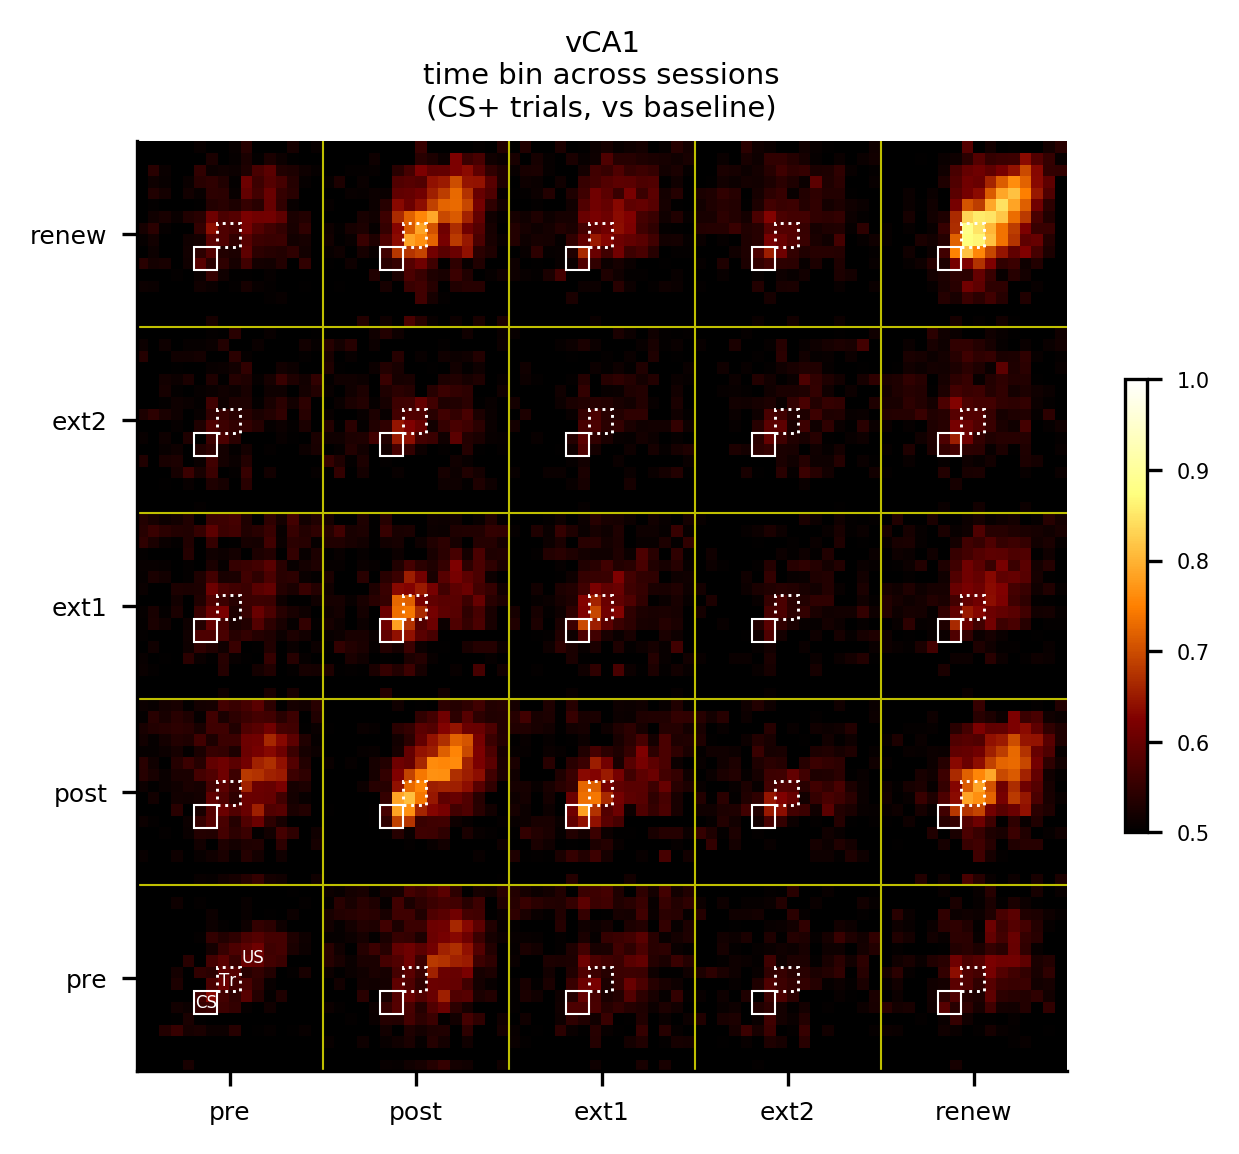

In [84]:
fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_means_all_CSp,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_yticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('vCA1\ntime bin across sessions\n(CS+ trials, vs baseline)')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(5,5.45,"CS",fontsize=4, color='w')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w')
pl.text(9,9.35,"US",fontsize=4, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../img/%s_MEGA_MATRIX_CSp.pdf'%NOTEBOOK_NAME)

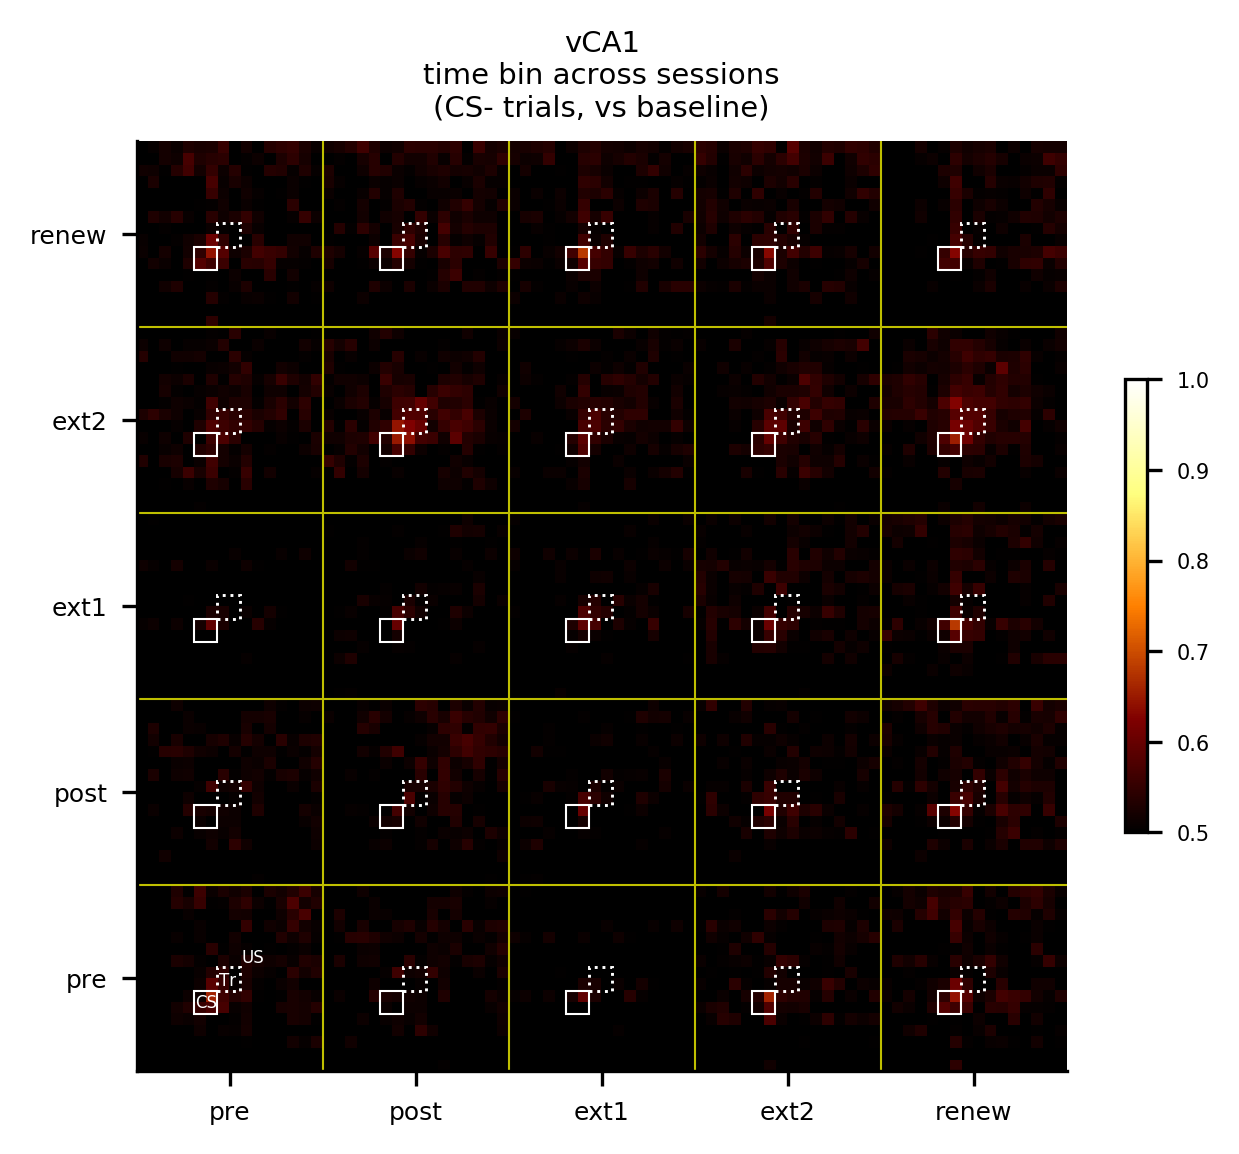

In [83]:
fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_means_all_CSm,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_yticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('vCA1\ntime bin across sessions\n(CS- trials, vs baseline)')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2,2,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2,2,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(5,5.45,"CS",fontsize=4, color='w')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w')
pl.text(9,9.35,"US",fontsize=4, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../img/%s_MEGA_MATRIX_CSm.pdf'%NOTEBOOK_NAME)

In [87]:
len(all_comparisons)

20

In [ ]:
baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSp = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,c))

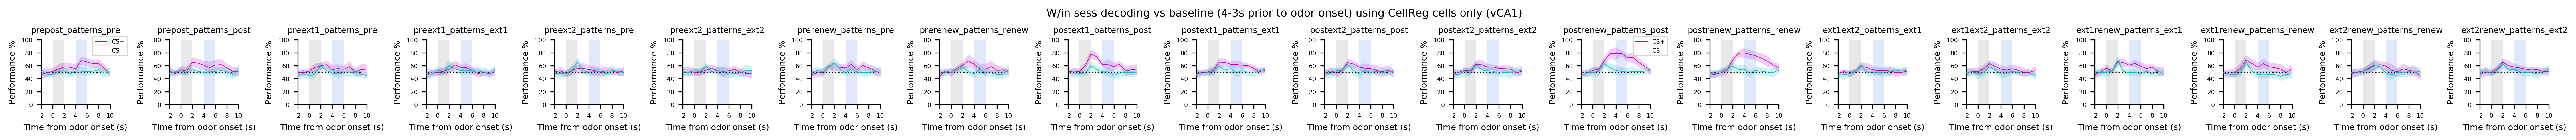

In [9]:
fig, ax = pl.subplots(1,20, figsize=(30, 1.5))

for comp,c,la in zip(['CSp','CSm'],['m','c'],['CS+','CS-']):
    for i,sess in zip(range(len(all_comparisons)),all_comparisons):
        ax[i].plot([(t-4) for t in range(16)], [(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,t,comp)))*100) for t in range(16)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,t,comp)))*100) for t in range(16)])
        s = np.array([np.std(eval("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s"%(AC[i].split('_')[0],AC[i].split('_')[-1],ACP[i],t,t,comp)))*100 for t in range(16)])
        ax[i].fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[i].set_title(sess)
for x in range(len(all_comparisons)):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-2, 9)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -5,9, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 6), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].legend(bbox_to_anchor=(.75, 1.05), loc='upper left', borderaxespad=0.)
ax[12].legend(bbox_to_anchor=(.75, 1.05), loc='upper left', borderaxespad=0.)
pl.suptitle("W/in sess decoding vs baseline (4-3s prior to odor onset) using CellReg cells only (vCA1)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

In [82]:
save_workspace(db)

Could not store variable 'CS2'. Skipping...
Could not store variable 'fig'. Skipping...
Could not store variable 'Tr2'. Skipping...
Could not store variable 'Tr5'. Skipping...
Could not store variable 'Tr3'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ax'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'Tr4'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'CS4'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'im'. Skipping...
Could not store variable 'CS3'. Skipping...
Could not store variable 'CS5'. Skipping...
Could not store variable 'CS1'. Skipping...
Could not store variable 'patches'. Skipping...
Could not store variable 'Tr1'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable